<a href="https://colab.research.google.com/github/FabricioCruzDev/AnaliseDeDados/blob/master/EngenhariaDados/RegressaoLinear/Regressao_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Regressão linear

##Utilizando a regreção linear com a biblioteca Sklearn

---

Fundamentos básicos de ETL, busca de correlações entre as variáveis, criação das bases de treino e como resultado final foi realizado um exemplo de predição.



In [31]:
%pip install plotly
%pip install cufflinks
%pip install chart-studio

In [74]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import cufflinks as cf
import chart_studio.plotly as py
import matplotlib.pyplot as plt

In [33]:
df = pd.read_csv('/content/drive/MyDrive/PosGraduacao/CRISP-DM/data/USA_Housing.csv', sep=',')

In [34]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


* Não vou precisar da coluna Address
* Vou padronizar os nomes das colunas

In [36]:
df.drop(['Address'], axis=1, inplace=True)

In [38]:
new_columns = ['avg_area_income', 'avg_area_house_age', 'avg_area_number_of_rooms',
       'avg_area_number_of_bedrooms', 'area_population', 'price']

for i, c in enumerate(df.columns):
  df.rename(columns={c:new_columns[i]}, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   avg_area_income              5000 non-null   float64
 1   avg_area_house_age           5000 non-null   float64
 2   avg_area_number_of_rooms     5000 non-null   float64
 3   avg_area_number_of_bedrooms  5000 non-null   float64
 4   area_population              5000 non-null   float64
 5   price                        5000 non-null   float64
dtypes: float64(6)
memory usage: 234.5 KB


In [42]:
round(df.describe(),3)

,avg_area_income,avg_area_house_age,avg_area_number_of_rooms,avg_area_number_of_bedrooms,area_population,price
count,5000.000,5000.000,5000.000,5000.000,5000.000,5000.000
mean,68583.109,5.977,6.988,3.981,36163.516,1232072.654
std,10657.991,0.991,1.006,1.234,9925.650,353117.627
min,17796.631,2.644,3.236,2.000,172.611,15938.658
25%,61480.562,5.322,6.299,3.140,29403.929,997577.135
50%,68804.286,5.970,7.003,4.050,36199.407,1232669.378
75%,75783.339,6.651,7.666,4.490,42861.291,1471210.204
max,107701.748,9.519,10.760,6.500,69621.713,2469065.594


## Usando o boxplot

In [47]:
for c in df.columns:
  fig = px.box(df[c])
  fig.show()


##Preparando os dados

In [48]:
import seaborn as sns

###Pairplot

Correlação das colunas com elas mesmas

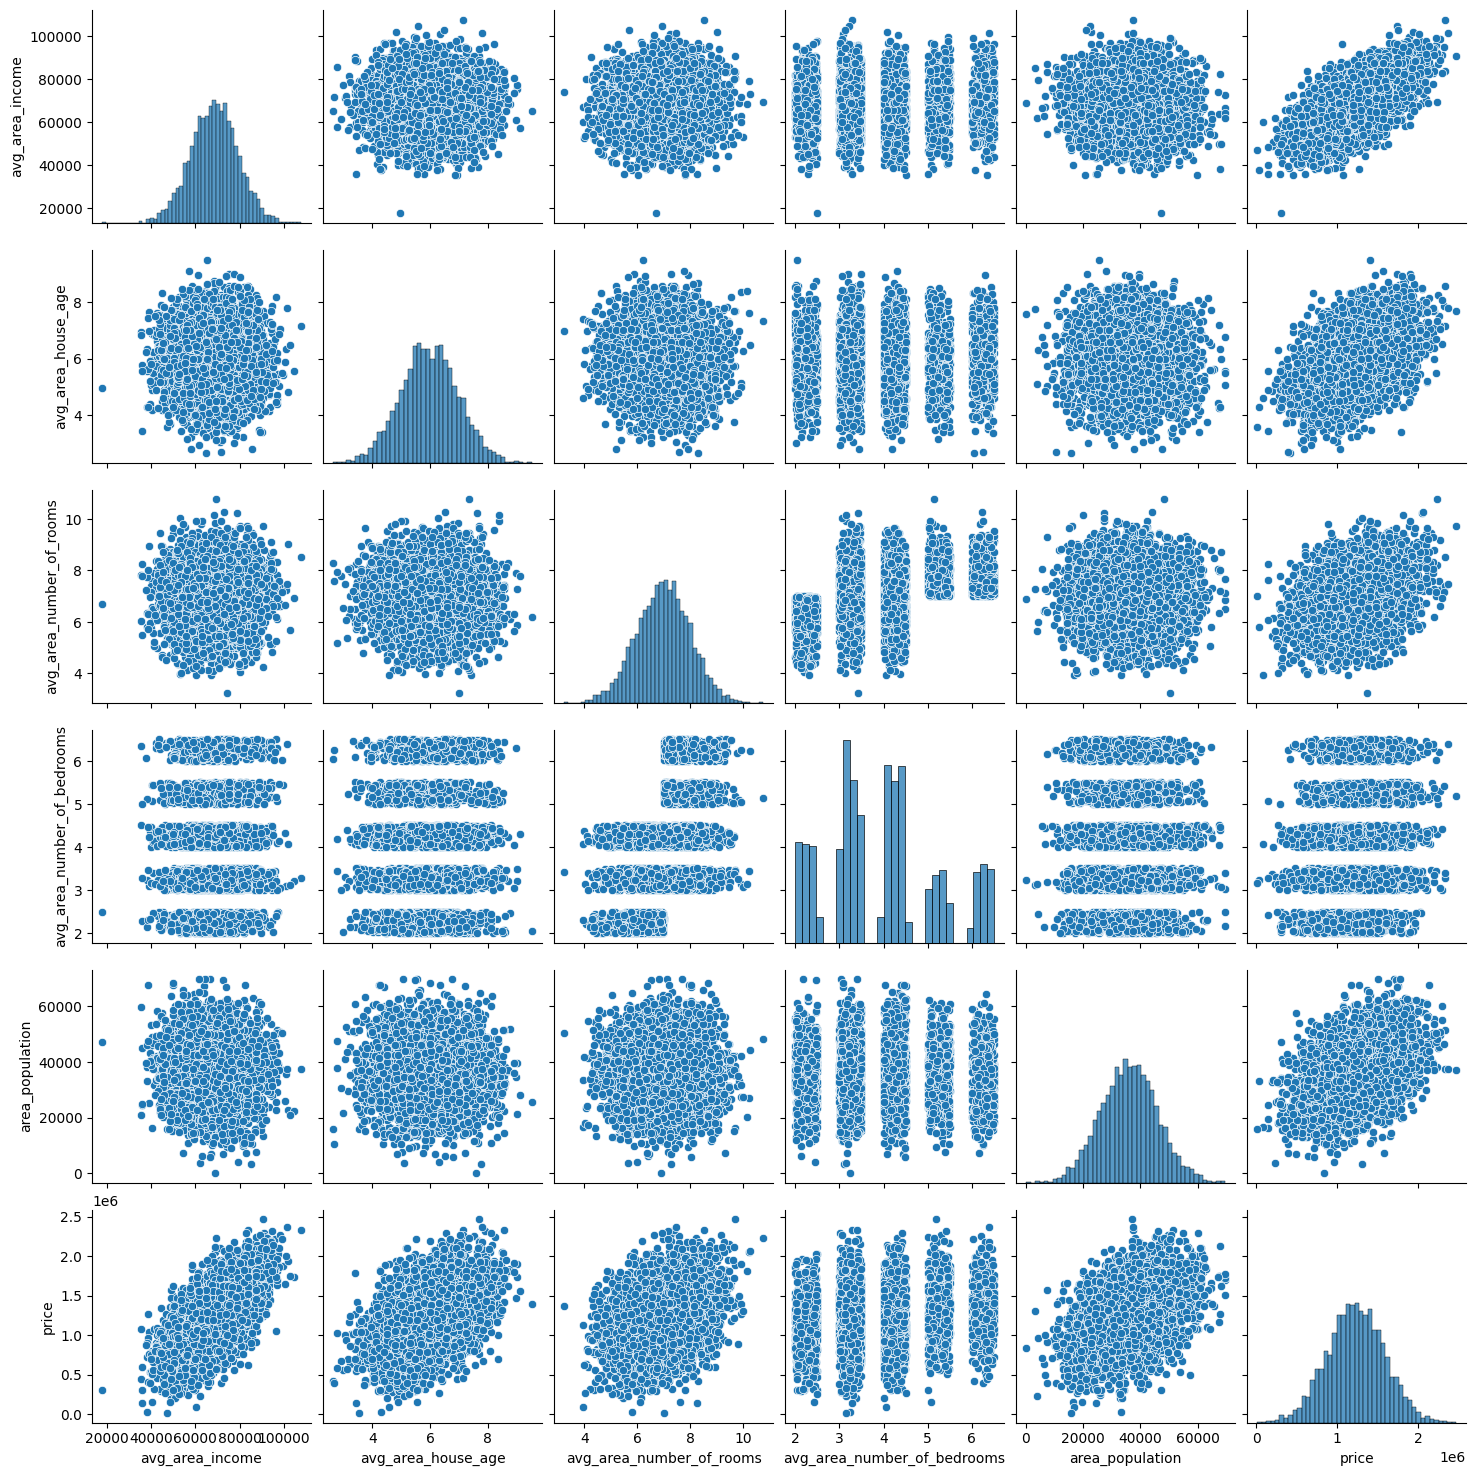

In [51]:
sns.pairplot(df);

Comparando todas as colunas com o preço:

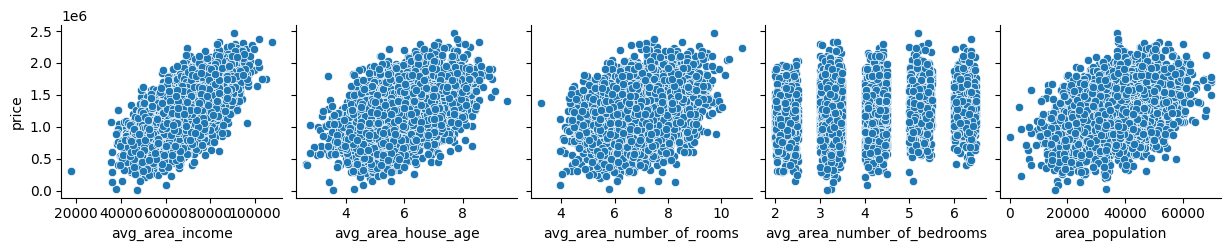

In [52]:
sns.pairplot(df, x_vars=df.columns[:-1], y_vars=['price']);

**Há uma relação das outras variáveis com o preço**

In [54]:
df.corr()

,avg_area_income,avg_area_house_age,avg_area_number_of_rooms,avg_area_number_of_bedrooms,area_population,price
avg_area_income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
avg_area_house_age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
avg_area_number_of_rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
avg_area_number_of_bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
area_population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


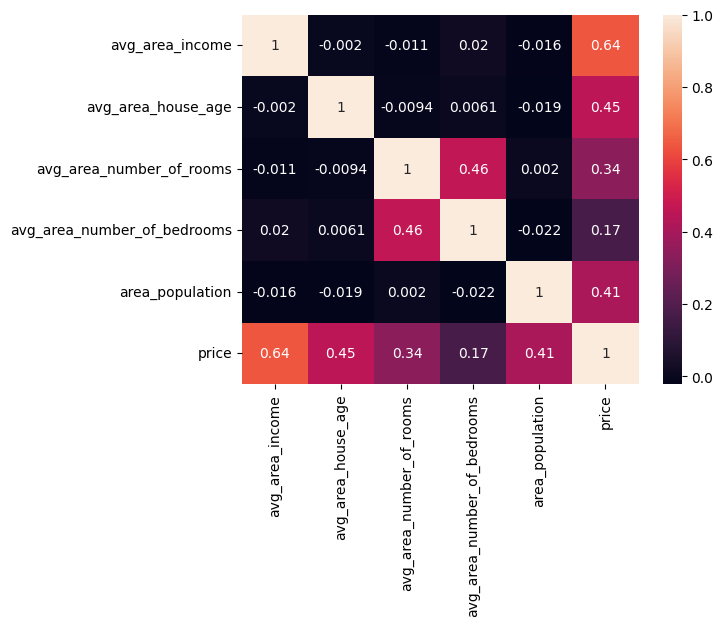

In [57]:
sns.heatmap(df.corr(), annot=True);

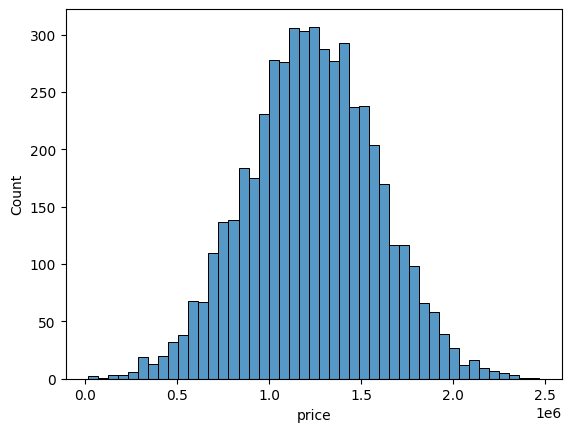

In [58]:
sns.histplot(df['price']);

* Distribuição normal, a grande maioria dos dados estão próximo a mediana

###Separando as variáveis x (explicaticas) e as variáveis y:

In [61]:
x = df[df.columns[:-1]]
y = df[['price']]
print(x)
print(y)


      avg_area_income  avg_area_house_age  ...  avg_area_number_of_bedrooms  area_population
0        79545.458574            5.682861  ...                         4.09     23086.800503
1        79248.642455            6.002900  ...                         3.09     40173.072174
2        61287.067179            5.865890  ...                         5.13     36882.159400
3        63345.240046            7.188236  ...                         3.26     34310.242831
4        59982.197226            5.040555  ...                         4.23     26354.109472
...               ...                 ...  ...                          ...              ...
4995     60567.944140            7.830362  ...                         3.46     22837.361035
4996     78491.275435            6.999135  ...                         4.02     25616.115489
4997     63390.686886            7.250591  ...                         2.13     33266.145490
4998     68001.331235            5.534388  ...                        

##Importando a biblioteca de Sklearn para Machine Learning

In [62]:
from sklearn.model_selection import train_test_split

###Criando as bases de treino e teste.
  * Definindo o tamanho da base treino
  * Usando o random_state para embaralhar os dados

In [63]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, train_size= 0.7, random_state= 42)

In [66]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

print(3500/5000)

(3500, 5)
(1500, 5)
(3500, 1)
(1500, 1)
0.7


In [67]:
from sklearn.linear_model import LinearRegression

In [68]:
lm = LinearRegression()

In [69]:
lm.fit(X_train, Y_train) #Treinando as bases

LinearRegression()

In [71]:
y_pred = lm.predict(X_test)

In [72]:
from sklearn.metrics import r2_score
r = r2_score(Y_test, y_pred)

In [73]:
print("r_quadrado:", r)

r_quadrado: 0.914681849875402


Há 91% de chance de acerto

### Plotando gráfico mostrando o resultado real e o resultado preditivo

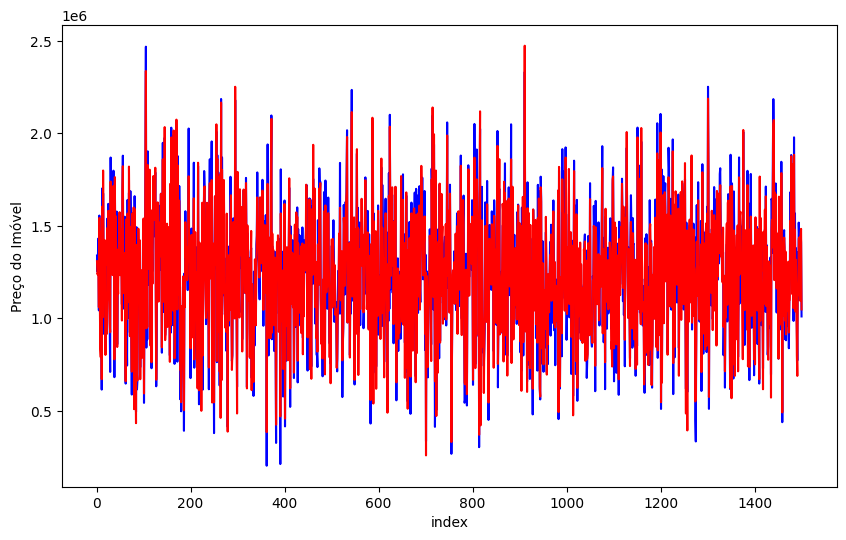

In [81]:
c = [i for i in range(1, 1501, 1)]
fig = plt.figure(figsize=(10,6))
plt.plot(c, Y_test, color='blue')
plt.plot(c, y_pred, color='red')
plt.xlabel('index')
plt.ylabel('Preço do Imóvel');


### Realizando uma predição

In [84]:
avg_area_income = 50
avg_area_house_age = 30
avg_area_number_of_rooms = 7
avg_area_number_of_bedrooms = 5
area_population = 200
entrada = [[avg_area_income, avg_area_house_age, avg_area_number_of_rooms, avg_area_number_of_bedrooms, area_population]]

lm.predict(entrada)[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([3183762.92246664])